# Star Wars Survey

The survey was done by FiveThrityEight before "Star Wars: The Force Awakens" came out. The team was interested in answering some questions about *Star Wars fans*. In particular, they wondered: **Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed *Star Wars fan* using the online tool SurveyMonkey. They received 835 total responses, which you can find on [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The dataset has several columns, including:

|Columns                                                                |Description                          | 
|-----------------------------------------------------------------------|-------------------------------------|
|`RespondentID`                                                         |An anonyme ID for the respondent     |
|`Gender`                                                               |The respondent's gender              |
|`Age`                                                                  |The respondent's age                 |
|`Household Income`                                                     |The respondent's income              |
|`Education`                                                            |The respondent's education level     |
|`Location (Census Region)`                                             |The respondent's location            |
|`Have you ever seen any of the 6 films in the Star Wars franchise?`    |Has a "Yes" or "No" response         |
|`Do you consider yourself to be a fan of the Star Wars film franchise?`|Has a "Yes" or "No" response         |

There are several other columns containing answers to auestions about the Star Wars movies. For some questions, the respondent had to check on or more boxes. This type of data is difficult to represent in columnar format. As a result, this dataset needs a lot of cleaning.

After cleaning the data, we are going to find out 3 main questions :
- Which is the higest-ranked movie and the most viewed movie among the 6 episodes of Star Wars franchise ?
- Who is the most favorite character and who is the most hated one in the franchise ?
- The popularity of the characters in Star Wars ?

## Overview

In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv('starwars.txt', encoding='ISO-8859-1')
pd.set_option('display.max_columns', 100)
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We need to remove the invalid rows. `RespondentID` is supposed to be a unique ID for each respondent, but it's blank in some rows.

In [3]:
# Check the null values in the RespondantID column
star_wars['RespondentID'].isnull().sum()

1

In [4]:
# remove any rows where RespondantID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars['RespondentID'].isnull().sum()

0

## Cleaning and Mapping Yes/No Columns

The next two columns, which are:
- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent Yes/No questions. They can also be `NaN` when a respondent chooses not to answer the question.

In [5]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Both columns are currently string types, because the mains values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to Boolean having only the values `True`, `False` and `NaN`

In [6]:
convert_bool = {'Yes': True, 'No': False}

# Converting each column to Boolean type
star_wars.columns[2:4].map(convert_bool)

# Quick check of the results
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and Mapping Checkbox Columns

The next six columns stand for a single checkbox question : `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:
- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw *Star Wars: Episode I The Phantom Menace*;
- `Unnamed: 4` - Whether or not the respondent saw *Star Wars: Episode II Attack of the Clones*;
- `Unnamed: 5` - Whether or not the respondent saw *Star Wars: Episode III Revenge of the Sith*;
- `Unnamed: 6` - Whether or not the respondent saw *Star Wars: Episode IV A New Hope*;
- `Unnamed: 7` - Whether or not the respondent saw *Star Wars: Episode V The Empire Strikes Back*;
- `Unnamed: 8` - Whether or not the respondent saw *Star Wars: Episode VI Return of the Jedi*.

For each of these columns, if the value in a cell is the title of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [7]:
mapping = {
    'Star Wars: Episode I  The Phantom Menace': True,
    np.nan: False,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True
    
}

# Convert each column to Boolean type
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mapping)
    
# Rename the six columns
cols = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}

star_wars.rename(columns = cols, inplace=True)

#Quick check of the result
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite one. Each of the following columns can contain the ranking value from `1` to `6`, or `NaN`:
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked *Star Wars: Episode I The Phantom Menance*;
- `Unnamed: 10` - How much they liked *Star Wars: Episode II Attack of the Clones*;
- `Unnamed: 11` - How much they liked *Star Wars: Episode III Revenge of the Sith*;
- `Unnamed: 12` - How much they liked *Star Wars: Episode IV A NeW Hope*;
- `Unnamed: 13` - How much they liked *Star Wars: Episode V The Empire Strikes Back*;
- `Unnamed: 14` - How much they liked *Star Wars: Episode VI Return of the Jedi*.

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [8]:
# Converting to numeric type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Renaming the columns
ranking = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10':'ranking_2',
    'Unnamed: 11':'ranking_3',
    'Unnamed: 12':'ranking_4',
    'Unnamed: 13':'ranking_5',
    'Unnamed: 14':'ranking_6',
}

star_wars.rename(columns = ranking, inplace=True)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## The Highest-Ranked Movie

In [9]:
means = star_wars.mean()
mean_ranking = means["ranking_1":"ranking_6"]
mean_ranking

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

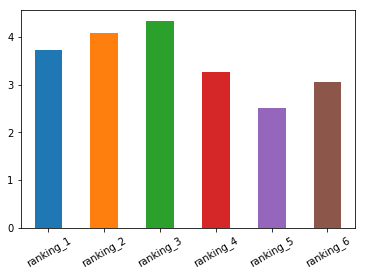

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

mean_ranking.plot.bar(rot=30)
plt.show()

According to the chart, the `ranking_5` column, which is the mean ranking of the *Star Wars: Episode V The Empire Strikes Back*, has the lowest value. Reminding that a lower ranking is better because 1 is the best and 6 is the least, the <font color='purple'>***The Empire Strikes Back* is no doubt the most favorite movie**</font> of Star Wars fan. 

## The Most Viewed Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call `mean()` method, they treat Booleans like integers, considering `True` a 1 and `False` a 0. That means we can figure out how many people have seen each movie just by sum up each column.

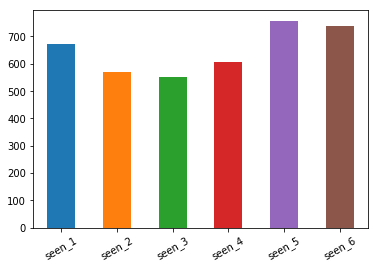

In [11]:
sums = star_wars.sum()
views = sums['seen_1':"seen_6"]

views.plot.bar(rot=30)
plt.show()

The most viewed movie is <font color='purple'>**The Empire Strikes Back**</font>. The results seem to have strong positive correlations with the rankings.

## Exploring the Data by Binary Segments

Let's examine how certain segments of the survey population responded. There are several columns that segment our data into 2 groups. Here are a few examples:
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - True or False;
- `Do you consider yourself to be a fan of the Star Trek franchise?`- Yes or No;
- `Gender` - Male or Female.

We are going to split the dataset into 2 groups by Gender

In [12]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

### The most viewed movie and the highest-ranked movie by Gender

In [13]:
men_views = males[males.columns[3:9]].sum()
men_ranking = males[males.columns[9:15]].mean()

women_views = females[females.columns[3:9]].sum()
women_ranking = females[females.columns[9:15]].mean()

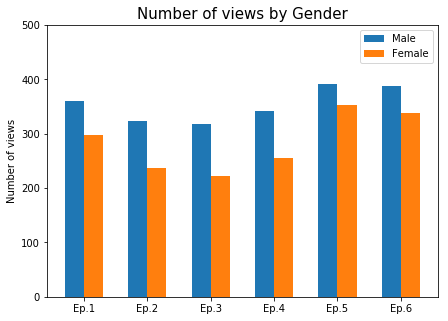

In [14]:
# Visualizing the views of movies by Gender
from numpy import arange
plt.figure(figsize=(7,5))
plt.bar(arange(6)-0.15, men_views, label='Male', width=0.3)
plt.bar(arange(6)+0.15, women_views, label='Female', width=0.3)
plt.title("Number of views by Gender", fontsize=15)
plt.xticks(range(6), ['Ep.1', 'Ep.2', 'Ep.3', 'Ep.4', 'Ep.5', 'Ep.6'])
plt.ylabel('Number of views')
plt.ylim(0,500)
plt.legend(loc='upper right')

plt.show()

There are always more male respondents than female respondents who watched Star Wars's episodes. *The Empire Strikes Back* is the movie where the gender gap is the smallest, that means this movie is really attractive by both men and women. 

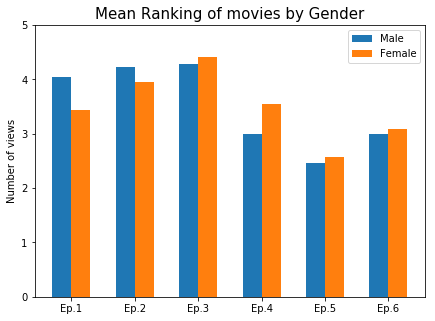

In [15]:
# Visualizing the movie rankings by Gender
plt.figure(figsize=(7,5))
plt.bar(arange(6)-0.15, men_ranking, label='Male', width=0.3)
plt.bar(arange(6)+0.15, women_ranking, label='Female', width=0.3)
plt.title("Mean Ranking of movies by Gender", fontsize=15)
plt.xticks(range(6), ['Ep.1', 'Ep.2', 'Ep.3', 'Ep.4', 'Ep.5', 'Ep.6'])
plt.ylabel('Number of views')
plt.ylim(0,5)
plt.legend(loc='upper right')

plt.show()

The highest-ranked movie is obviously *The Empire Strikes Back*. 

## Who is the most favorite character and who is the most disliked one ?

The columns from `Please state whether you view the following characters... her.` to `Unnamed: 28` stand for the votes for one of 14 characters starring in the Star Wars franchise. These columns contains the graduated votes:

- `Very favorably`
- `Somewhat favorably`
- `Neither favorably nor unfavorably (neutral)`
- `Somewhat unfavorably`
- `Very unfavorably`
- Or `Unfamiliar (N/A)` and `NaN` (which can be combined)

We'll need to rename the columns to get the dataset easy to understand:
 
|Columns                                                         |to rename as...           |
|----------------------------------------------------------------|--------------------------|
|`Please state whether you view the following characters... her.`|`Han Solo`                |
|`Unnamed: 16`                                                   |`Luke Skywalker`          |
|`Unnamed: 17`                                                   |`Princess Leia Organa`    |
|`Unnamed: 18`                                                   |`Anakin Skywalker`        |
|`Unnamed: 19`                                                   |`Obi Wan Kenobi`          |
|`Unnamed: 20`                                                   |`Emperor Palpatine`       |
|`Unnamed: 21`                                                   |`Darth Vader`             |
|`Unnamed: 22`                                                   |`Lando Calrissian`        |
|`Unnamed: 23`                                                   |`Boba Fett`               |
|`Unnamed: 24`                                                   |`C-3P0`                   |
|`Unnamed: 25`                                                   |`R2 D2`                   |
|`Unnamed: 26`                                                   |`Jar Jar Binks`           |
|`Unnamed: 27`                                                   |`Padme Amidala`           |
|`Unnamed: 28`                                                   |`Yoda`                    |

In [16]:
characters = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker', 'Unnamed: 17': 'Princess Leia Organa', 'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi', 'Unnamed: 20': 'Emperor Palpatine', 'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian', 'Unnamed: 23': 'Boba Fett', 'Unnamed: 24': 'C-3P0', 'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks', 'Unnamed: 27': 'Padme Amidala', 'Unnamed: 28': 'Yoda'
}

# Renaming the columns
star_wars.rename(columns=characters, inplace=True)
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

In [17]:
# Rename the "Unfamiliar (N/A)" and NaN answers to "NAN" one.
def unfam(value):
    if value == 'Unfamiliar (N/A)':
        return np.nan
    else:
        return value

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].apply(unfam)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,NaN,NaN,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In order to find out who is the most favorited character and who is the most unfavorite one, we are going to **transform the votes into scores**. Whoever gets the `Very favorably` vote earn 2 pts, `Somewhat favorably` 1 pts, `Neutral` and `NaN` 0 pts, `Somewhat unfavorably` -1 pts, `Very unfavorably` -2 pts. 

Then we'll sum up the columns, whoever earns the biggest score becomes the most favorite character and, in the opposite, whoever earns the smallest score becomes the most disliked one.

In [18]:
# Extract the votes dataframe
votes = star_wars[star_wars.columns[15:29]].copy()
votes.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,NaN,NaN,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [19]:
# Change the columns into numeric values
def numeric(value):
    if value == 'Very favorably':
        return 2
    elif value == 'Somewhat favorably':
        return 1
    elif pd.isnull(value):
        return 0
    elif value == 'Neither favorably nor unfavorably (neutral)':
        return 0
    elif value == 'Somewhat unfavorably':
        return -1
    else:
        return -2

for col in votes.columns:
    votes[col] = votes[col].apply(numeric)
    
votes.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2,2,2,2,2,2,2,0,0,2,2,2,2,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,1,2,1,-1,2,2,2,2,2
5,2,1,1,-1,2,-2,1,0,2,1,1,-2,1,1


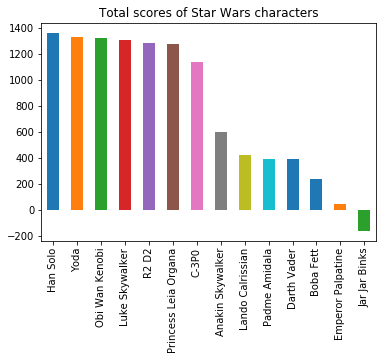

In [20]:
total_scores = votes.sum().sort_values(ascending=False)

total_scores.plot.bar(title='Total scores of Star Wars characters')
plt.show()

- The most favorite character is **Han Solo**.
- The most disliked character is **Jar Jar Blinks**, with a negative score.

##  The popularity of 14 characters in Star Wars franchise

In [21]:
# Create a dictionary containing characters with the number of NAN answers
popularity = {}

for col in star_wars.columns[15:29]:
    n_a = star_wars[col].isnull().sum()
    pop = 835 - int(n_a)
    popularity[col] = pop
    
popularity

{'Han Solo': 463,
 'Luke Skywalker': 474,
 'Princess Leia Organa': 472,
 'Anakin Skywalker': 420,
 'Obi Wan Kenobi': 457,
 'Emperor Palpatine': 307,
 'Darth Vader': 465,
 'Lando Calrissian': 321,
 'Boba Fett': 329,
 'C-3P0': 461,
 'R2 D2': 469,
 'Jar Jar Binks': 361,
 'Padme Amidala': 299,
 'Yoda': 465}

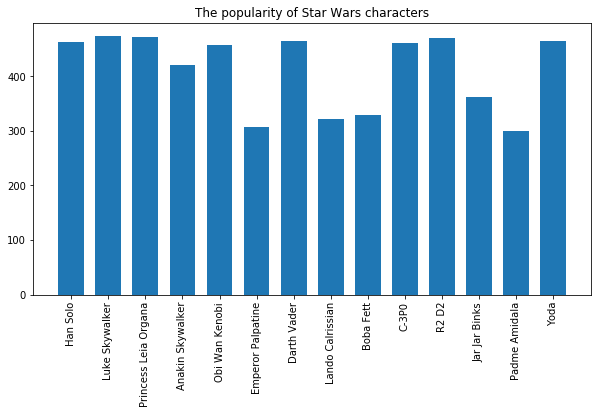

In [22]:
plt.figure(figsize=(10,5))
plt.bar(range(len(popularity)), list(popularity.values()), align='center', width=0.7)
plt.xticks(range(len(popularity)), popularity.keys(), rotation=90)
plt.title('The popularity of Star Wars characters')
           
plt.show()

We can see that Han Solo, Luke Skywalker, Princess Leia, Obi Wan, Darth Vader, C-3P0, R2 D2 and Yoda appear to be the most well-known characters in the franchise.

Whereas Emperor Palpatine, Lando Calrissian, Boba Fett and Padme Amidala are not popular. The unfamiliarity with these characters take over 50% of the survey.